In [2]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from scipy.stats import pearsonr

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

pd.set_option("display.precision", 14) 

In [3]:
data = pd.read_csv('avro-issues.csv')

In [4]:
data

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,project,assignee,comment_count,key,description_length,summary_length,watch_count,resolution,days_in_current_status
0,Open,Major,2013-07-02T02:33:35.279+0000,Bug,keyer,2013-07-01T11:38:36.150+0000,NaN,0,AVRO,NaN,2,AVRO-1350,3042.0,46,1,NaN,231.24858841599999
1,Resolved,Critical,2013-06-20T16:41:00.043+0000,Bug,scott_carey,2013-06-20T16:29:17.709+0000,2013-06-20T16:41:00.024+0000,0,AVRO,NaN,2,AVRO-1349,41.0,43,2,Fixed,242.03858963400000
2,Resolved,Major,2013-06-20T17:38:07.697+0000,Bug,skye,2013-06-06T17:41:12.389+0000,2013-06-20T17:18:00.789+0000,0,AVRO,skye,6,AVRO-1346,528.0,55,6,Fixed,242.01288630200000
3,Open,Minor,2013-05-30T22:07:02.491+0000,Improvement,davidtaylor,2013-05-30T22:02:52.515+0000,NaN,0,AVRO,NaN,1,AVRO-1342,312.0,44,1,NaN,262.81506567900004
4,Open,Minor,2013-05-25T05:35:30.283+0000,Improvement,jdonofrio,2013-05-25T05:35:30.283+0000,NaN,0,AVRO,NaN,0,AVRO-1340,559.0,97,1,NaN,268.50073966200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,Closed,Major,2014-01-23T21:58:54.257+0000,New Feature,iocanel,2012-01-04T01:41:29.916+0000,2014-01-10T19:28:47.501+0000,0,AVRO,iocanel,27,AVRO-987,249.0,20,6,Fixed,24.81782564940000
1454,Closed,Major,2014-01-24T21:50:17.361+0000,New Feature,hammer,2011-12-12T12:13:30.972+0000,2014-01-23T21:55:12.599+0000,4,AVRO,mark.lamley,51,AVRO-975,NaN,17,11,Fixed,24.81783522270000
1455,Closed,Major,2013-08-20T17:46:09.242+0000,New Feature,patrickangeles,2011-05-17T12:38:35.682+0000,2013-07-01T18:05:03.682+0000,5,AVRO,dmcintosh,20,AVRO-823,88.0,29,14,Fixed,180.99334667099998
1456,Open,Major,2014-01-10T18:19:25.676+0000,New Feature,cutting,2010-08-24T19:39:23.387+0000,NaN,0,AVRO,cutting,10,AVRO-625,243.0,34,12,NaN,1272.91471075000004


# Verifico tipologia dei dati per ogni colonna

In [7]:
data.dtypes

status                     object
priority                   object
updated                    object
issue_type                 object
reporter                   object
created                    object
resolutiondate             object
vote_count                  int64
project                    object
assignee                   object
comment_count               int64
key                        object
description_length        float64
summary_length              int64
watch_count                 int64
resolution                 object
days_in_current_status    float64
dtype: object

In [8]:
print('Unique colonna project', data['project'].unique())
print('Conteggio valori colonna key', len(data['key'].unique()))
print('Unique colonna priority', data['priority'].unique())
print('Unique colonna issue_type', data['issue_type'].unique())
print('Unique colonna reporter', len(data['reporter'].unique()))
print('Unique colonna vote_count', data['vote_count'].unique())
print('Unique colonna assignee', len(data['assignee'].unique()))
print('Unique colonna comment_count', len(data['comment_count'].unique()))
print('Unique colonna description_length', len(data['description_length'].unique()))
print('Unique colonna summary_length', len(data['summary_length'].unique()))
print('Unique colonna watch_count', data['watch_count'].unique())
print('Unique colonna days_in_current_status', len(data['days_in_current_status'].unique()))
print('Unique colonna resolution', len(data['resolution'].unique()))



print()
print('Conteggio valori unique per ogni colonna')
print()

for a in data.columns:
    print('colonna '+str(a)+'',len(data[a].unique()))


# la colonna  project non dà informazioni rilevanti avendo sempre 
#lo stesso valore
# la colonna key è un semplice identificativo che non dà info

Unique colonna project ['AVRO']
Conteggio valori colonna key 1458
Unique colonna priority ['Major' 'Critical' 'Minor' 'Trivial' 'Blocker']
Unique colonna issue_type ['Bug' 'Improvement' 'New Feature' 'Wish' 'Task' 'Test' 'Sub-task']
Unique colonna reporter 343
Unique colonna vote_count [ 0  1  6  3  4  2  5  8  9  7 18]
Unique colonna assignee 153
Unique colonna comment_count 44
Unique colonna description_length 762
Unique colonna summary_length 115
Unique colonna watch_count [ 1  2  6  4  5  3 12  7  9 11  0 33  8 14 18 13 10 20 46 27]
Unique colonna days_in_current_status 1458
Unique colonna resolution 9

Conteggio valori unique per ogni colonna

colonna status 5
colonna priority 5
colonna updated 1458
colonna issue_type 7
colonna reporter 343
colonna created 1458
colonna resolutiondate 1135
colonna vote_count 11
colonna project 1
colonna assignee 153
colonna comment_count 44
colonna key 1458
colonna description_length 762
colonna summary_length 115
colonna watch_count 20
colonna res

In [9]:
# colonna project e key possono essere droppate

del data['project']
del data['key']

# Per convertire data in secondi

In [10]:
def convertTimestamp(stringTimestamp):
    if '.' in stringTimestamp:
        t = datetime.strptime(stringTimestamp, "%Y-%m-%dT%H:%M:%S.%f+0000")
    else:
        t = datetime.strptime(stringTimestamp, "%Y-%m-%dT%H:%M:%S")
    
    return t.timestamp()

# Converto data in secondi

In [11]:
data.loc[:,'updated'] = data.loc[:,'updated'].apply(lambda x: convertTimestamp(x))
data.loc[:,'created'] = data.loc[:,'created'].apply(lambda x: convertTimestamp(x))

In [12]:
data

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,assignee,comment_count,description_length,summary_length,watch_count,resolution,days_in_current_status
0,Open,Major,1.37272521527900e+09,Bug,keyer,1.37267151615000e+09,NaN,0,NaN,2,3042.0,46,1,NaN,231.24858841599999
1,Resolved,Critical,1.37173926004300e+09,Bug,scott_carey,1.37173855770900e+09,2013-06-20T16:41:00.024+0000,0,NaN,2,41.0,43,2,Fixed,242.03858963400000
2,Resolved,Major,1.37174268769700e+09,Bug,skye,1.37053327238900e+09,2013-06-20T17:18:00.789+0000,0,skye,6,528.0,55,6,Fixed,242.01288630200000
3,Open,Minor,1.36994442249100e+09,Improvement,davidtaylor,1.36994417251500e+09,NaN,0,NaN,1,312.0,44,1,NaN,262.81506567900004
4,Open,Minor,1.36945293028300e+09,Improvement,jdonofrio,1.36945293028300e+09,NaN,0,NaN,0,559.0,97,1,NaN,268.50073966200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,Closed,Major,1.39051073425700e+09,New Feature,iocanel,1.32563768991600e+09,2014-01-10T19:28:47.501+0000,0,iocanel,27,249.0,20,6,Fixed,24.81782564940000
1454,Closed,Major,1.39059661736100e+09,New Feature,hammer,1.32368841097200e+09,2014-01-23T21:55:12.599+0000,4,mark.lamley,51,NaN,17,11,Fixed,24.81783522270000
1455,Closed,Major,1.37701356924200e+09,New Feature,patrickangeles,1.30562871568200e+09,2013-07-01T18:05:03.682+0000,5,dmcintosh,20,88.0,29,14,Fixed,180.99334667099998
1456,Open,Major,1.38937436567600e+09,New Feature,cutting,1.28267156338700e+09,NaN,0,cutting,10,243.0,34,12,NaN,1272.91471075000004


In [13]:
data = data[data['resolutiondate'].notna()]

In [14]:
data['status'].unique()

array(['Resolved', 'Closed'], dtype=object)

In [15]:
data

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,assignee,comment_count,description_length,summary_length,watch_count,resolution,days_in_current_status
1,Resolved,Critical,1.37173926004300e+09,Bug,scott_carey,1.37173855770900e+09,2013-06-20T16:41:00.024+0000,0,NaN,2,41.0,43,2,Fixed,242.03858963400000
2,Resolved,Major,1.37174268769700e+09,Bug,skye,1.37053327238900e+09,2013-06-20T17:18:00.789+0000,0,skye,6,528.0,55,6,Fixed,242.01288630200000
6,Closed,Minor,1.37701356420800e+09,Improvement,bdechoux,1.36916479727400e+09,2013-08-07T19:23:23.544+0000,0,bdechoux,7,279.0,40,5,Fixed,180.99340255799999
8,Closed,Critical,1.37701356407800e+09,Bug,kirwin,1.36802091822800e+09,2013-05-09T21:04:56.888+0000,0,cutting,4,1025.0,45,3,Fixed,180.99340406599998
12,Resolved,Minor,1.36974250345600e+09,New Feature,vince83,1.36860713177100e+09,2013-05-28T13:59:56.490+0000,6,vince83,4,1260.0,45,4,Duplicate,265.15043595800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Closed,Major,1.39057203132800e+09,Bug,ssmith,1.34617590305900e+09,2013-07-31T02:31:08.085+0000,1,scott_carey,7,5596.0,52,6,Fixed,180.99337238599998
1448,Closed,Minor,1.39051073681800e+09,Improvement,pdlug,1.33465978111900e+09,2013-12-19T20:28:15.386+0000,1,dukex,30,430.0,71,8,Fixed,24.81779600000000
1453,Closed,Major,1.39051073425700e+09,New Feature,iocanel,1.32563768991600e+09,2014-01-10T19:28:47.501+0000,0,iocanel,27,249.0,20,6,Fixed,24.81782564940000
1454,Closed,Major,1.39059661736100e+09,New Feature,hammer,1.32368841097200e+09,2014-01-23T21:55:12.599+0000,4,mark.lamley,51,NaN,17,11,Fixed,24.81783522270000


In [16]:
data.loc[:,'resolutiondate'] = data.loc[:,'resolutiondate'].apply(lambda x: convertTimestamp(x))

/home/scicchitano/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
data

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,assignee,comment_count,description_length,summary_length,watch_count,resolution,days_in_current_status
1,Resolved,Critical,1.37173926004300e+09,Bug,scott_carey,1.37173855770900e+09,1.37173926002400e+09,0,NaN,2,41.0,43,2,Fixed,242.03858963400000
2,Resolved,Major,1.37174268769700e+09,Bug,skye,1.37053327238900e+09,1.37174148078900e+09,0,skye,6,528.0,55,6,Fixed,242.01288630200000
6,Closed,Minor,1.37701356420800e+09,Improvement,bdechoux,1.36916479727400e+09,1.37589620354400e+09,0,bdechoux,7,279.0,40,5,Fixed,180.99340255799999
8,Closed,Critical,1.37701356407800e+09,Bug,kirwin,1.36802091822800e+09,1.36812629688800e+09,0,cutting,4,1025.0,45,3,Fixed,180.99340406599998
12,Resolved,Minor,1.36974250345600e+09,New Feature,vince83,1.36860713177100e+09,1.36974239649000e+09,6,vince83,4,1260.0,45,4,Duplicate,265.15043595800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Closed,Major,1.39057203132800e+09,Bug,ssmith,1.34617590305900e+09,1.37523066808500e+09,1,scott_carey,7,5596.0,52,6,Fixed,180.99337238599998
1448,Closed,Minor,1.39051073681800e+09,Improvement,pdlug,1.33465978111900e+09,1.38748129538600e+09,1,dukex,30,430.0,71,8,Fixed,24.81779600000000
1453,Closed,Major,1.39051073425700e+09,New Feature,iocanel,1.32563768991600e+09,1.38937852750100e+09,0,iocanel,27,249.0,20,6,Fixed,24.81782564940000
1454,Closed,Major,1.39059661736100e+09,New Feature,hammer,1.32368841097200e+09,1.39051051259900e+09,4,mark.lamley,51,NaN,17,11,Fixed,24.81783522270000


In [18]:
data['assignee'].isna().sum()

148

In [19]:
for a in data.columns:
    print(a + '', data[a].isnull().sum())

status 0
priority 0
updated 0
issue_type 0
reporter 0
created 0
resolutiondate 0
vote_count 0
assignee 148
comment_count 0
description_length 55
summary_length 0
watch_count 0
resolution 0
days_in_current_status 0


In [20]:
del data['assignee']

In [21]:
data

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,comment_count,description_length,summary_length,watch_count,resolution,days_in_current_status
1,Resolved,Critical,1.37173926004300e+09,Bug,scott_carey,1.37173855770900e+09,1.37173926002400e+09,0,2,41.0,43,2,Fixed,242.03858963400000
2,Resolved,Major,1.37174268769700e+09,Bug,skye,1.37053327238900e+09,1.37174148078900e+09,0,6,528.0,55,6,Fixed,242.01288630200000
6,Closed,Minor,1.37701356420800e+09,Improvement,bdechoux,1.36916479727400e+09,1.37589620354400e+09,0,7,279.0,40,5,Fixed,180.99340255799999
8,Closed,Critical,1.37701356407800e+09,Bug,kirwin,1.36802091822800e+09,1.36812629688800e+09,0,4,1025.0,45,3,Fixed,180.99340406599998
12,Resolved,Minor,1.36974250345600e+09,New Feature,vince83,1.36860713177100e+09,1.36974239649000e+09,6,4,1260.0,45,4,Duplicate,265.15043595800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Closed,Major,1.39057203132800e+09,Bug,ssmith,1.34617590305900e+09,1.37523066808500e+09,1,7,5596.0,52,6,Fixed,180.99337238599998
1448,Closed,Minor,1.39051073681800e+09,Improvement,pdlug,1.33465978111900e+09,1.38748129538600e+09,1,30,430.0,71,8,Fixed,24.81779600000000
1453,Closed,Major,1.39051073425700e+09,New Feature,iocanel,1.32563768991600e+09,1.38937852750100e+09,0,27,249.0,20,6,Fixed,24.81782564940000
1454,Closed,Major,1.39059661736100e+09,New Feature,hammer,1.32368841097200e+09,1.39051051259900e+09,4,51,NaN,17,11,Fixed,24.81783522270000


In [22]:
data = data[data['description_length'].notna()]

In [23]:
data

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,comment_count,description_length,summary_length,watch_count,resolution,days_in_current_status
1,Resolved,Critical,1.37173926004300e+09,Bug,scott_carey,1.37173855770900e+09,1.37173926002400e+09,0,2,41.0,43,2,Fixed,242.03858963400000
2,Resolved,Major,1.37174268769700e+09,Bug,skye,1.37053327238900e+09,1.37174148078900e+09,0,6,528.0,55,6,Fixed,242.01288630200000
6,Closed,Minor,1.37701356420800e+09,Improvement,bdechoux,1.36916479727400e+09,1.37589620354400e+09,0,7,279.0,40,5,Fixed,180.99340255799999
8,Closed,Critical,1.37701356407800e+09,Bug,kirwin,1.36802091822800e+09,1.36812629688800e+09,0,4,1025.0,45,3,Fixed,180.99340406599998
12,Resolved,Minor,1.36974250345600e+09,New Feature,vince83,1.36860713177100e+09,1.36974239649000e+09,6,4,1260.0,45,4,Duplicate,265.15043595800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,Closed,Major,1.39051073402100e+09,Improvement,brocknoland,1.35761405535800e+09,1.38748330109500e+09,0,8,46.0,47,4,Fixed,24.81782836650000
1446,Closed,Major,1.39057203132800e+09,Bug,ssmith,1.34617590305900e+09,1.37523066808500e+09,1,7,5596.0,52,6,Fixed,180.99337238599998
1448,Closed,Minor,1.39051073681800e+09,Improvement,pdlug,1.33465978111900e+09,1.38748129538600e+09,1,30,430.0,71,8,Fixed,24.81779600000000
1453,Closed,Major,1.39051073425700e+09,New Feature,iocanel,1.32563768991600e+09,1.38937852750100e+09,0,27,249.0,20,6,Fixed,24.81782564940000


In [24]:
data['priority'].unique()

array(['Critical', 'Major', 'Minor', 'Blocker', 'Trivial'], dtype=object)

In [25]:
for priority in data.loc[:,'priority']:
    if priority == 'Critical':
        data.priority[data.priority == 'Critical'] = 4.0
    if priority == 'Major':
        data.priority[data.priority == 'Major'] = 3.0
    if priority == 'Minor':
        data.priority[data.priority == 'Minor'] = 2.0
    if priority == 'Blocker':
        data.priority[data.priority == 'Blocker'] = 1.0
    if priority == 'Trivial':
        data.priority[data.priority == 'Trivial'] = 0.0

/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/scicchitano/.local/lib/python3.6/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [26]:
for issue in data.loc[:, 'issue_type']:
    if issue == 'Bug':
        data.issue_type[data.issue_type == 'Bug'] = 6.0
    if issue == 'Improvement':
        data.issue_type[data.issue_type == 'Improvement'] = 5.0
    if issue == 'New Feature':
        data.issue_type[data.issue_type == 'New Feature'] = 4.0
    if issue == 'Wish':
        data.issue_type[data.issue_type == 'Wish'] = 3.0
    if issue == 'Task':
        data.issue_type[data.issue_type == 'Task'] = 2.0
    if issue == 'Test':
        data.issue_type[data.issue_type == 'Test'] = 1.0
    if issue == 'Sub-task':
        data.issue_type[data.issue_type == 'Sub-task'] = 0.0     

/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [27]:
for resolution in data.loc[:,'resolution']:
    if resolution == 'Fixed':
        data.resolution[data.resolution == 'Fixed'] = 0.0
    if resolution == 'Duplicate':
        data.resolution[data.resolution == 'Duplicate'] = 1.0
    if resolution == 'Invalid':
        data.resolution[data.resolution == 'Invalid'] = 1.0
    if resolution == 'Later':
        data.resolution[data.resolution == 'Later'] = 1.0
    if resolution == 'Not A Problem':
        data.resolution[data.resolution == 'Not A Problem'] = 1.0
    if resolution == 'Won\'t Fix':
        data.resolution[data.resolution == 'Won\'t Fix'] = 1.0
    if resolution == 'Cannot Reproduce':
        data.resolution[data.resolution == 'Cannot Reproduce'] = 1.0
    if resolution == 'Incomplete':
        data.resolution[data.resolution == 'Incomplete'] = 1.0

/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [28]:
data['resolution'].unique()

array([0.0, 1.0], dtype=object)

In [29]:
for status in data.loc[:,'status']:
    if status== 'Resolved':
        data.status[data.status == 'Resolved'] = 1.0
    if status == 'Closed':
        data.status[data.status == 'Closed'] = 0.0

/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [30]:
le = LabelEncoder()
le.fit(data['reporter'].unique())
le.transform(data['reporter'])
data['reporter'] = le.transform(data['reporter']).astype(float)

/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [31]:
data['priority'].unique()

array([4.0, 3.0, 2.0, 1.0, 0.0], dtype=object)

In [32]:
data.dtypes

status                     object
priority                   object
updated                   float64
issue_type                 object
reporter                  float64
created                   float64
resolutiondate            float64
vote_count                  int64
comment_count               int64
description_length        float64
summary_length              int64
watch_count                 int64
resolution                 object
days_in_current_status    float64
dtype: object

In [33]:
data['resolution'] = data['resolution'].astype('float')
data['issue_type'] = data['issue_type'].astype('float')
data['status'] = data['resolution'].astype('float')
data['priority'] = data['priority'].astype('float')
data['vote_count'] = data['vote_count'].astype('float')
data['comment_count'] = data['comment_count'].astype('float')
data['summary_length'] = data['summary_length'].astype('float')
data['watch_count'] = data['watch_count'].astype('float')

/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [34]:
data.dtypes

status                    float64
priority                  float64
updated                   float64
issue_type                float64
reporter                  float64
created                   float64
resolutiondate            float64
vote_count                float64
comment_count             float64
description_length        float64
summary_length            float64
watch_count               float64
resolution                float64
days_in_current_status    float64
dtype: object

In [35]:
data

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,comment_count,description_length,summary_length,watch_count,resolution,days_in_current_status
1,0.0,4.0,1.37173926004300e+09,6.0,195.0,1.37173855770900e+09,1.37173926002400e+09,0.0,2.0,41.0,43.0,2.0,0.0,242.03858963400000
2,0.0,3.0,1.37174268769700e+09,6.0,200.0,1.37053327238900e+09,1.37174148078900e+09,0.0,6.0,528.0,55.0,6.0,0.0,242.01288630200000
6,0.0,2.0,1.37701356420800e+09,5.0,16.0,1.36916479727400e+09,1.37589620354400e+09,0.0,7.0,279.0,40.0,5.0,0.0,180.99340255799999
8,0.0,4.0,1.37701356407800e+09,6.0,124.0,1.36802091822800e+09,1.36812629688800e+09,0.0,4.0,1025.0,45.0,3.0,0.0,180.99340406599998
12,1.0,2.0,1.36974250345600e+09,4.0,233.0,1.36860713177100e+09,1.36974239649000e+09,6.0,4.0,1260.0,45.0,4.0,1.0,265.15043595800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,0.0,3.0,1.39051073402100e+09,5.0,20.0,1.35761405535800e+09,1.38748330109500e+09,0.0,8.0,46.0,47.0,4.0,0.0,24.81782836650000
1446,0.0,3.0,1.39057203132800e+09,6.0,209.0,1.34617590305900e+09,1.37523066808500e+09,1.0,7.0,5596.0,52.0,6.0,0.0,180.99337238599998
1448,0.0,2.0,1.39051073681800e+09,5.0,167.0,1.33465978111900e+09,1.38748129538600e+09,1.0,30.0,430.0,71.0,8.0,0.0,24.81779600000000
1453,0.0,3.0,1.39051073425700e+09,4.0,89.0,1.32563768991600e+09,1.38937852750100e+09,0.0,27.0,249.0,20.0,6.0,0.0,24.81782564940000


# Informazioni statistiche dataset

In [48]:
print('Pearson tra description_length e summary_length: ', pearsonr(data['description_length'], data['summary_length']))
print('Pearson tra created e updated: ', pearsonr(data['created'], data['updated']))
print('Pearson tra vote_count e comment_count: ', pearsonr(data['vote_count'], data['comment_count']))
print('Pearson tra updated e days_in_current_status: ', pearsonr(data['updated'], data['days_in_current_status']))
print('Pearson tra status e priority: ', pearsonr(data['status'], data['priority']))
print('Pearson tra issue_type e priority: ', pearsonr(data['issue_type'], data['priority']))
print('Pearson tra watch_count e comment_count: ', pearsonr(data['watch_count'], data['comment_count']))
print('Pearson tra watch_count e vote_count: ', pearsonr(data['watch_count'], data['vote_count']))
print('Pearson tra reporter e status: ', pearsonr(data['reporter'], data['status']))

Pearson tra description_length e summary_length:  (0.21625325389484645, 6.950136493753455e-13)
Pearson tra created e updated:  (0.9276523882407943, 0.0)
Pearson tra vote_count e comment_count:  (0.22874295369275158, 2.8241390761578776e-14)
Pearson tra updated e days_in_current_status:  (-0.9585253814930221, 0.0)
Pearson tra status e priority:  (0.024164330359023174, 0.4278075718842977)
Pearson tra issue_type e priority:  (-0.02432466889281795, 0.4247474876010246)
Pearson tra watch_count e comment_count:  (0.4816993628477448, 9.082645529805534e-64)
Pearson tra watch_count e vote_count:  (0.4611030240033078, 6.560426300562997e-58)
Pearson tra reporter e status:  (-0.0005365749297868367, 0.9859539219593726)


In [33]:
data.describe()

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,comment_count,description_length,summary_length,watch_count,resolution,days_in_current_status
count,1079.00000000000000,1079.00000000000000,1.07900000000000e+03,1079.00000000000000,1079.00000000000000,1.07900000000000e+03,1.07900000000000e+03,1079.00000000000000,1079.00000000000000,1079.00000000000000,1079.00000000000000,1079.00000000000000,1079.00000000000000,1079.00000000000000
mean,0.11306765523633,2.69786839666358,1.30911643311959e+09,5.14550509731233,122.65708989805375,1.29829741215798e+09,1.30209538305793e+09,0.10658016682113,5.95458758109361,552.63021316033360,51.90454124189064,1.39017608897127,0.11306765523633,1002.53714365125313
std,0.31682232846162,0.71005572001191,4.17274251194200e+07,1.15823889879457,71.83810599127727,4.10910251292661e+07,4.20993659365866e+07,0.56550770268452,6.56329075394710,869.99601083205198,20.53358640015453,2.04602330851397,0.31682232846162,482.97248250913901
min,0.00000000000000,0.00000000000000,1.24760460786200e+09,0.00000000000000,0.00000000000000,1.23930774821600e+09,1.23939911605200e+09,0.00000000000000,0.00000000000000,16.00000000000000,8.00000000000000,0.00000000000000,0.00000000000000,4.92609929929000
25%,0.00000000000000,3.00000000000000,1.26745976402650e+09,5.00000000000000,46.00000000000000,1.26341795464300e+09,1.26402276447350e+09,0.00000000000000,2.00000000000000,146.50000000000000,37.00000000000000,0.00000000000000,0.00000000000000,615.89928766050002
50%,0.00000000000000,3.00000000000000,1.30470204146000e+09,5.00000000000000,131.00000000000000,1.29012086999100e+09,1.29588436574000e+09,0.00000000000000,4.00000000000000,279.00000000000000,49.00000000000000,1.00000000000000,0.00000000000000,1073.71090669999990
75%,0.00000000000000,3.00000000000000,1.33943769737900e+09,6.00000000000000,194.00000000000000,1.32947808091200e+09,1.33654354915100e+09,0.00000000000000,7.00000000000000,569.50000000000000,64.00000000000000,2.00000000000000,0.00000000000000,1449.01889650000021
max,1.00000000000000,4.00000000000000,1.39222937935200e+09,6.00000000000000,243.00000000000000,1.39222541453100e+09,1.39222937932600e+09,8.00000000000000,84.00000000000000,11762.00000000000000,144.00000000000000,33.00000000000000,1.00000000000000,1678.78225122999993


In [34]:
Y = data.iloc[:,6]
#del data['resolutiondate']
X = data[data.columns.difference(['resolutiondate'])]

In [35]:
X

,comment_count,created,days_in_current_status,description_length,issue_type,priority,reporter,resolution,status,summary_length,updated,vote_count,watch_count
1,2.0,1.37173855770900e+09,242.03858963400000,41.0,6.0,4.0,195.0,0.0,0.0,43.0,1.37173926004300e+09,0.0,2.0
2,6.0,1.37053327238900e+09,242.01288630200000,528.0,6.0,3.0,200.0,0.0,0.0,55.0,1.37174268769700e+09,0.0,6.0
6,7.0,1.36916479727400e+09,180.99340255799999,279.0,5.0,2.0,16.0,0.0,0.0,40.0,1.37701356420800e+09,0.0,5.0
8,4.0,1.36802091822800e+09,180.99340406599998,1025.0,6.0,4.0,124.0,0.0,0.0,45.0,1.37701356407800e+09,0.0,3.0
12,4.0,1.36860713177100e+09,265.15043595800000,1260.0,4.0,2.0,233.0,1.0,1.0,45.0,1.36974250345600e+09,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,8.0,1.35761405535800e+09,24.81782836650000,46.0,5.0,3.0,20.0,0.0,0.0,47.0,1.39051073402100e+09,0.0,4.0
1446,7.0,1.34617590305900e+09,180.99337238599998,5596.0,6.0,3.0,209.0,0.0,0.0,52.0,1.39057203132800e+09,1.0,6.0
1448,30.0,1.33465978111900e+09,24.81779600000000,430.0,5.0,2.0,167.0,0.0,0.0,71.0,1.39051073681800e+09,1.0,8.0
1453,27.0,1.32563768991600e+09,24.81782564940000,249.0,4.0,3.0,89.0,0.0,0.0,20.0,1.39051073425700e+09,0.0,6.0


In [36]:
Y

1       1.37173926002400e+09
2       1.37174148078900e+09
6       1.37589620354400e+09
8       1.36812629688800e+09
12      1.36974239649000e+09
                ...         
1444    1.38748330109500e+09
1446    1.37523066808500e+09
1448    1.38748129538600e+09
1453    1.38937852750100e+09
1455    1.37269470368200e+09
Name: resolutiondate, Length: 1079, dtype: float64

# Normalizzo i dati numerici con la standardizzazione

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
X_norm = X
X_norm = StandardScaler().fit_transform(X_norm)

# CON DATI NORMALIZZATI

In [53]:
X_norm = pd.DataFrame(X_norm)

In [54]:
X_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.60281062176474,1.78810825563306,-1.57535105142548,-0.58835610401970,0.73809569437596,1.83469463559792,1.00749394142176,-0.35704581455131,-0.35704581455131,-0.43385847129058,1.50145535817914,-0.18855550343629,0.29819146859415
1,0.00692236242476,1.75876257188976,-1.57540429514420,-0.02832384773893,0.73809569437596,0.42570138875795,1.07712716048925,-0.35704581455131,-0.35704581455131,0.15082090904564,1.50153754018397,-0.18855550343629,2.25410997688039
2,0.15935560847214,1.72544362469197,-1.70180441433676,-0.31466477548823,-0.12568440782758,-0.98329185808202,-1.48537530119450,-0.35704581455131,-0.35704581455131,-0.58002831637463,1.62791295580391,-0.18855550343629,1.76513034980883
3,-0.29794412966999,1.69759303017507,-1.70180441121298,0.54320804419442,0.73809569437596,1.83469463559792,0.01870223066335,-0.35704581455131,-0.35704581455131,-0.33641190790121,1.62791295268701,-0.18855550343629,0.78717109566571
4,-0.29794412966999,1.71186586412854,-1.52747552133464,0.81344948203011,-0.98946451003111,-0.98329185808202,1.53670640633471,2.80076102070169,2.80076102070169,-0.33641190790121,1.45358078873185,10.42629953348989,1.27615072273727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0.31178885451952,1.44421194150236,-2.02531765931260,-0.58260628619340,-0.12568440782758,0.42570138875795,-1.42966872594050,-0.35704581455131,-0.35704581455131,-0.23896534451184,1.95152335366680,-0.18855550343629,1.27615072273727
1075,0.15935560847214,1.16572153395797,-1.70180447683719,5.79969150098988,0.73809569437596,0.42570138875795,1.20246695481074,-0.35704581455131,-0.35704581455131,0.00465106396159,1.95299302813790,1.58058700271808,2.25410997688039
1076,3.66532026756177,0.88533276061721,-2.02531772635888,-0.14102027713424,-0.12568440782758,-0.98329185808202,0.61754791464380,-0.35704581455131,-0.35704581455131,0.93039341616060,1.95152342072815,1.58058700271808,3.23206923102351
1077,3.20802052941965,0.66566739943420,-2.02531766494100,-0.34916368244598,-0.98946451003111,0.42570138875795,-0.46873030280910,-0.35704581455131,-0.35704581455131,-1.55449395026833,1.95152335932518,-0.18855550343629,2.25410997688039


In [55]:
scaler = StandardScaler().fit(Y.values.reshape(-1,1))
Y_norm = scaler.transform(Y.values.reshape(-1,1))
Y_norm = pd.DataFrame(Y_norm)

In [56]:
Y_norm

,0
0,1.65504088441693
1,1.65509365943507
2,1.75382791034836
3,1.56918119416901
4,1.60758673721342
...,...
1074,2.02918765501013
1075,1.73801189833612
1076,2.02913999065624
1077,2.07422646278191


# Random Forest Regressor

In [57]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm,
                                                   Y_norm,test_size=0.2,random_state = 44)
y_test_norm = np.array(y_test_norm)
regr_norm = RandomForestRegressor(n_estimators=50, random_state=44)
regr_norm.fit(X_train_norm, y_train_norm)

y_pred_norm = regr_norm.predict(X_test_norm)

y_test_norm_ = scaler.inverse_transform(y_test_norm) # ritorno al formato originale
y_pred_norm = scaler.inverse_transform(y_pred_norm)


mae = metrics.mean_absolute_error(y_test_norm_, y_pred_norm)

mae_in_day = round((mae / 60) / 60 / 24)
rmse = np.sqrt(metrics.mean_squared_error(y_test_norm_, y_pred_norm))
rmse_in_day = round((rmse / 60) / 60 / 24)

print('Mean Absolute Error (MAE) in giorni arrotondato:', mae_in_day)
#print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_norm , y_pred_norm))
print('Root Mean Squared Error (RMSE):', rmse_in_day)
mape = np.mean(np.abs((y_test_norm_ - y_pred_norm) / np.abs(y_test_norm_)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

print("Training Accuracy = ", regr_norm.score(X_train_norm, y_train_norm))
print("Test Accuracy = ", regr_norm.score(X_test_norm, y_test_norm))

/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error (MAE) in giorni arrotondato: 15.0
Root Mean Squared Error (RMSE): 24.0
Mean Absolute Percentage Error (MAPE): 3.78
Accuracy: 96.22
Training Accuracy =  0.9996014167424678
Test Accuracy =  0.9977255082124818


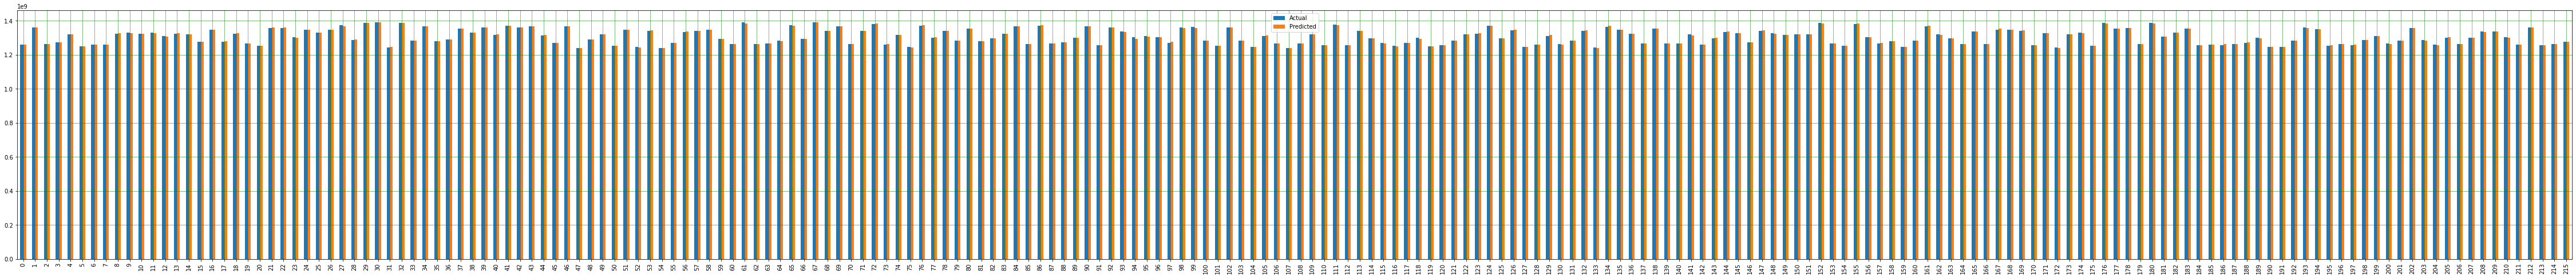

days_in_current_status    0.98336712868826
updated                   0.00978991701681
created                   0.00537277812732
description_length        0.00029465169380
comment_count             0.00029292091523
reporter                  0.00023926558832
watch_count               0.00020496703830
summary_length            0.00019824662976
priority                  0.00008986640983
issue_type                0.00008562411111
vote_count                0.00003755912521
resolution                0.00001617328429
status                    0.00001090137175
dtype: float64


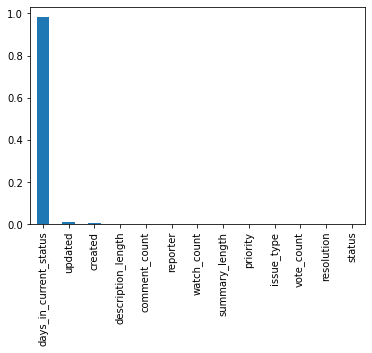

In [58]:
# Plot Attuali e Predetti valori
y_test_norm_ = y_test_norm_.reshape(-1)
tuples = list(zip(y_test_norm_,y_pred_norm))

df = pd.DataFrame(tuples, columns=['Actual','Predicted'])
df.plot(kind = 'bar', figsize=(80,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color = 'green')

plt.grid(which='minor', linestyle=':', linewidth='0.5', color = 'black')
plt.show()

# Analisi componenti che influenzano il modello

importance = regr_norm.feature_importances_
feature_imp = pd.Series(importance, index = X.columns).sort_values(ascending= False)

print(feature_imp)
feature_imp.plot(kind='bar')

# Decision Tree Regressor model

In [59]:
regr_norm = DecisionTreeRegressor(random_state=44)
regr_norm.fit(X_train_norm, y_train_norm)

y_pred_norm = regr_norm.predict(X_test_norm)

y_test_norm_ = scaler.inverse_transform(y_test_norm) # ritorno al formato originale
y_pred_norm = scaler.inverse_transform(y_pred_norm)


mae = metrics.mean_absolute_error(y_test_norm_, y_pred_norm)

mae_in_day = round((mae / 60) / 60 / 24)
rmse = np.sqrt(metrics.mean_squared_error(y_test_norm_, y_pred_norm))
rmse_in_day = round((rmse / 60) / 60 / 24)

print('Mean Absolute Error (MAE) in giorni arrotondato:', mae_in_day)
#print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_norm , y_pred_norm))
print('Root Mean Squared Error (RMSE):', rmse_in_day)
mape = np.mean(np.abs((y_test_norm_ - y_pred_norm) / np.abs(y_test_norm_)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

print("Training Accuracy = ", regr_norm.score(X_train_norm, y_train_norm))
print("Test Accuracy = ", regr_norm.score(X_test_norm, y_test_norm))

Mean Absolute Error (MAE) in giorni arrotondato: 18.0
Root Mean Squared Error (RMSE): 31.0
Mean Absolute Percentage Error (MAPE): 3.78
Accuracy: 96.22
Training Accuracy =  1.0
Test Accuracy =  0.9960816714342697


days_in_current_status    0.98062293745567
updated                   0.01267447643458
created                   0.00528261071697
description_length        0.00032913060607
comment_count             0.00029045117377
reporter                  0.00025607572761
watch_count               0.00016072463119
summary_length            0.00015313929035
priority                  0.00008965356556
issue_type                0.00005608626618
vote_count                0.00004777006659
resolution                0.00003052695234
status                    0.00000641711311
dtype: float64


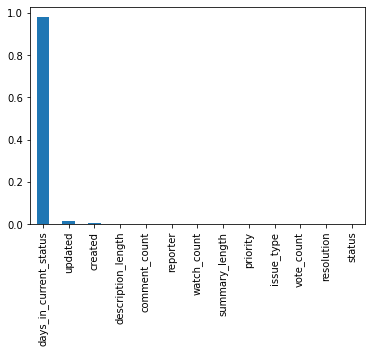

In [60]:
# Analisi componenti che influenzano il modello

importance = regr_norm.feature_importances_
feature_imp = pd.Series(importance, index = X.columns).sort_values(ascending= False)

print(feature_imp)
feature_imp.plot(kind='bar')

# Linear Regression

Mean Absolute Error (MAE) in giorni arrotondato: 30.0
Root Mean Squared Error (RMSE): 39.0
Mean Absolute Percentage Error (MAPE): 0.2
Accuracy: 99.8
Training Accuracy =  0.99416461417585
Test Accuracy =  0.9939449908035011


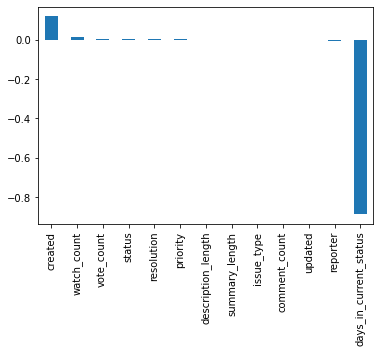

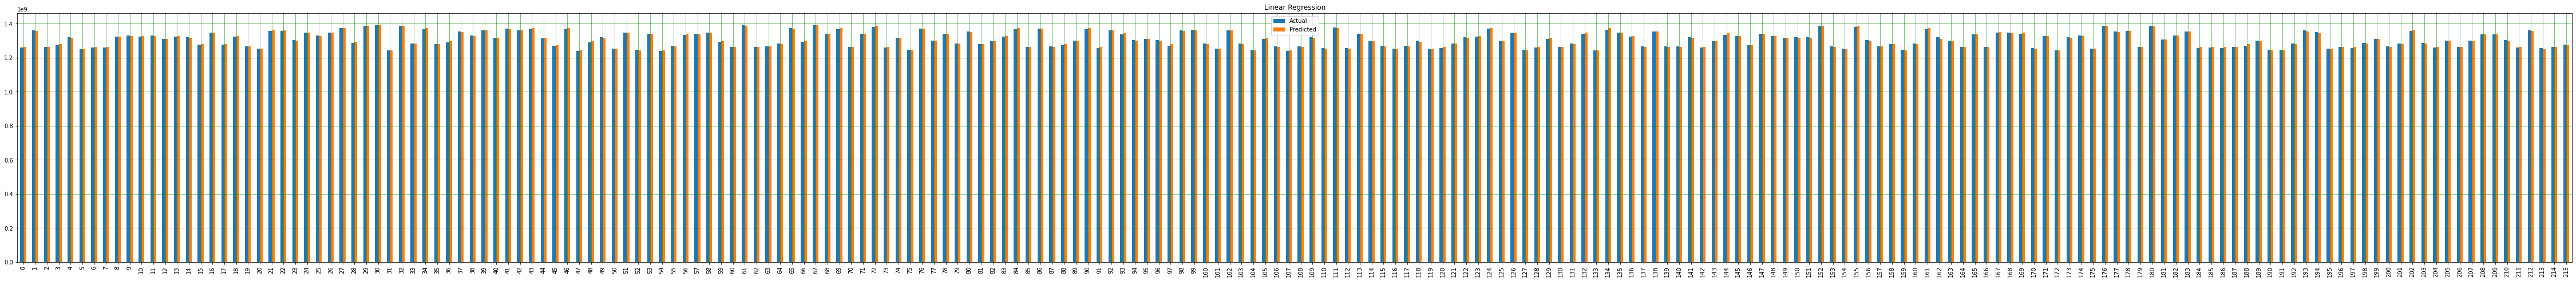

In [61]:
linear_model = LinearRegression()
linear_model.fit(X_train_norm, y_train_norm)

y_pred_linear_model = linear_model.predict(X_test_norm)

y_test_norm_ = scaler.inverse_transform(y_test_norm) # ritorno al formato originale
y_pred_norm = scaler.inverse_transform(y_pred_linear_model)

mae = metrics.mean_absolute_error(y_test_norm_, y_pred_norm)
mae_in_day = round((mae / 60) / 60 / 24)

rmse = np.sqrt(metrics.mean_squared_error(y_test_norm_, y_pred_norm))
rmse_in_day = round((rmse / 60) / 60 / 24)

print('Mean Absolute Error (MAE) in giorni arrotondato:', mae_in_day)
#print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_linear_model))
print('Root Mean Squared Error (RMSE):', rmse_in_day)
mape = np.mean(np.abs((y_test_norm_ - y_pred_norm) / np.abs(y_test_norm_)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

print("Training Accuracy = ", linear_model.score(X_train_norm, y_train_norm))
print("Test Accuracy = ", linear_model.score(X_test_norm, y_test_norm))

importance_linear_model = linear_model.coef_
feature_imp_linear_model = pd.Series(importance_linear_model.reshape(-1),index = X.columns).sort_values(ascending= False)
feature_imp_linear_model.plot(kind='bar')

y_test_norm_ = y_test_norm_.reshape(-1)
tuples = list(zip(y_test_norm_,y_pred_norm.reshape(-1)))

df = pd.DataFrame(tuples, columns=['Actual','Predicted'])

df.plot(kind = 'bar', figsize=(80,8), title = 'Linear Regression')

plt.grid(which='major', linestyle='-', linewidth='0.5', color = 'green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color = 'black')

plt.show()


In [62]:
group = data.groupby('resolution')

In [63]:
fixed = group.get_group(1.0)
other = group.get_group(0.0)

In [64]:
fixed

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,comment_count,description_length,summary_length,watch_count,resolution,days_in_current_status
12,1.0,2.0,1.36974250345600e+09,4.0,233.0,1.36860713177100e+09,1.36974239649000e+09,6.0,4.0,1260.0,45.0,4.0,1.0,265.15043595800000
14,1.0,2.0,1.36974250357700e+09,4.0,233.0,1.36819231009200e+09,1.36974221180500e+09,6.0,4.0,1409.0,43.0,4.0,1.0,265.15257348500000
42,1.0,2.0,1.36580827377000e+09,5.0,214.0,1.36580709133400e+09,1.36580827375100e+09,0.0,0.0,189.0,40.0,1.0,1.0,310.68426413999998
52,1.0,2.0,1.36672816382500e+09,5.0,186.0,1.36388107945700e+09,1.36672816380400e+09,0.0,21.0,562.0,51.0,3.0,1.0,300.03738851800000
56,1.0,3.0,1.36259250593000e+09,6.0,3.0,1.36258484703400e+09,1.36259250588000e+09,0.0,1.0,2105.0,45.0,2.0,1.0,347.94546596599997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,1.0,3.0,1.38201681729800e+09,6.0,127.0,1.38126926307800e+09,1.38197944754300e+09,0.0,11.0,499.0,51.0,3.0,1.0,123.51790288799999
1413,1.0,3.0,1.39051073510000e+09,6.0,25.0,1.37708453630100e+09,1.38737103830900e+09,0.0,1.0,623.0,41.0,2.0,1.0,24.81781582800000
1416,1.0,3.0,1.38736891548800e+09,6.0,24.0,1.37647346350300e+09,1.38736891546900e+09,0.0,6.0,531.0,35.0,2.0,1.0,61.18146873810000
1418,1.0,3.0,1.37542472482300e+09,5.0,67.0,1.37536438662900e+09,1.37542472480000e+09,0.0,1.0,113.0,44.0,1.0,1.0,199.38274959800000


Troppo pochi dati fixed per fare la sperimentazione. Di seguito sarà presentata aspettandoci una predizione non accurata. Dopo, l'analisi si concentrerà su other che rappresenta il terzo caso di interesse.

In [65]:
other

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,comment_count,description_length,summary_length,watch_count,resolution,days_in_current_status
1,0.0,4.0,1.37173926004300e+09,6.0,195.0,1.37173855770900e+09,1.37173926002400e+09,0.0,2.0,41.0,43.0,2.0,0.0,242.03858963400000
2,0.0,3.0,1.37174268769700e+09,6.0,200.0,1.37053327238900e+09,1.37174148078900e+09,0.0,6.0,528.0,55.0,6.0,0.0,242.01288630200000
6,0.0,2.0,1.37701356420800e+09,5.0,16.0,1.36916479727400e+09,1.37589620354400e+09,0.0,7.0,279.0,40.0,5.0,0.0,180.99340255799999
8,0.0,4.0,1.37701356407800e+09,6.0,124.0,1.36802091822800e+09,1.36812629688800e+09,0.0,4.0,1025.0,45.0,3.0,0.0,180.99340406599998
15,0.0,3.0,1.36940465887700e+09,5.0,25.0,1.36791997306700e+09,1.36939618239200e+09,0.0,4.0,463.0,49.0,3.0,0.0,269.15754379900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,0.0,3.0,1.39051073402100e+09,5.0,20.0,1.35761405535800e+09,1.38748330109500e+09,0.0,8.0,46.0,47.0,4.0,0.0,24.81782836650000
1446,0.0,3.0,1.39057203132800e+09,6.0,209.0,1.34617590305900e+09,1.37523066808500e+09,1.0,7.0,5596.0,52.0,6.0,0.0,180.99337238599998
1448,0.0,2.0,1.39051073681800e+09,5.0,167.0,1.33465978111900e+09,1.38748129538600e+09,1.0,30.0,430.0,71.0,8.0,0.0,24.81779600000000
1453,0.0,3.0,1.39051073425700e+09,4.0,89.0,1.32563768991600e+09,1.38937852750100e+09,0.0,27.0,249.0,20.0,6.0,0.0,24.81782564940000


In [66]:
fixed_norm = pd.DataFrame(StandardScaler().fit_transform(fixed),columns = fixed.columns)
fixed_norm

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,comment_count,description_length,summary_length,watch_count,resolution,days_in_current_status
0,0.0,-1.09007444905902,1.32404733368026,-0.72626800345569,1.46315652801937,1.61421478014460,1.46076501261262,7.31746412496909,-0.19481546322090,0.26084479513309,-0.49353422851667,1.83726084869850,0.0,-1.40146694812512
1,0.0,-1.09007444905902,1.32404733662046,-0.72626800345569,1.46315652801937,1.60447939831561,1.46076061675086,7.31746412496909,-0.19481546322090,0.36288569824770,-0.58234127258605,1.83726084869850,0.0,-1.40146245401330
2,0.0,-1.09007444905902,1.22844836880754,-0.03940989166039,1.21146103028661,1.54850109117698,1.36712524933115,-0.21612763238305,-0.98706501365258,-0.47261699839536,-0.71555183869010,-0.26410624700041,0.0,-1.30573289863992
3,0.0,-1.09007444905902,1.25080103859894,-0.03940989166039,0.84054134941729,1.50329983488057,1.38902041949297,-0.21612763238305,3.17224512611372,-0.21717232147089,-0.22711309630856,1.13680515013220,0.0,-1.32811776190214
4,0.0,0.37134404308604,1.15030751244907,0.64744822013492,-1.58368370769295,1.47287876911695,1.29058372732335,-0.21612763238305,-0.78900262604466,0.83953313829981,-0.49353422851667,0.43634945156589,0.0,-1.22739189631457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.0,0.37134404308604,1.62230437291557,0.64744822013492,0.05896059329978,1.91138025939282,1.75203059833183,-0.21612763238305,1.19162125003453,-0.26031713285491,-0.22711309630856,1.13680515013220,0.0,-1.69924678502882
118,0.0,0.37134404308604,1.82870049474716,0.64744822013492,-1.29224681558133,1.81316959421653,1.88036093180971,-0.21612763238305,-0.78900262604466,-0.17539718663873,-0.67114831665542,0.43634945156589,0.0,-1.90676193137292
119,0.0,0.37134404308604,1.75235652738989,0.64744822013492,-1.30549394704095,1.79882842711989,1.88031040409406,-0.21612763238305,0.20130931199493,-0.23840230802493,-0.93756944886353,0.43634945156589,0.0,-1.83030800939554
120,0.0,0.37134404308604,1.46212124502200,-0.03940989166039,-0.73586729427735,1.77279968418598,1.59601546439979,-0.21612763238305,-0.78900262604466,-0.52466470736657,-0.53793775055136,-0.26410624700041,0.0,-1.53974231814999


In [67]:
#Y_fixed_norm = scaler.transform(fixed_norm.values.reshape(-1,1))
Y_fixed_norm = pd.DataFrame(fixed_norm.resolutiondate)

In [68]:
Y_fixed_norm

,resolutiondate
0,1.46076501261262
1,1.46076061675086
2,1.36712524933115
3,1.38902041949297
4,1.29058372732335
...,...
117,1.75203059833183
118,1.88036093180971
119,1.88031040409406
120,1.59601546439979


In [69]:
fixed_norm = fixed_norm[fixed_norm.columns.difference(['resolutiondate'])]

In [70]:
fixed_norm

,comment_count,created,days_in_current_status,description_length,issue_type,priority,reporter,resolution,status,summary_length,updated,vote_count,watch_count
0,-0.19481546322090,1.61421478014460,-1.40146694812512,0.26084479513309,-0.72626800345569,-1.09007444905902,1.46315652801937,0.0,0.0,-0.49353422851667,1.32404733368026,7.31746412496909,1.83726084869850
1,-0.19481546322090,1.60447939831561,-1.40146245401330,0.36288569824770,-0.72626800345569,-1.09007444905902,1.46315652801937,0.0,0.0,-0.58234127258605,1.32404733662046,7.31746412496909,1.83726084869850
2,-0.98706501365258,1.54850109117698,-1.30573289863992,-0.47261699839536,-0.03940989166039,-1.09007444905902,1.21146103028661,0.0,0.0,-0.71555183869010,1.22844836880754,-0.21612763238305,-0.26410624700041
3,3.17224512611372,1.50329983488057,-1.32811776190214,-0.21717232147089,-0.03940989166039,-1.09007444905902,0.84054134941729,0.0,0.0,-0.22711309630856,1.25080103859894,-0.21612763238305,1.13680515013220
4,-0.78900262604466,1.47287876911695,-1.22739189631457,0.83953313829981,0.64744822013492,0.37134404308604,-1.58368370769295,0.0,0.0,-0.49353422851667,1.15030751244907,-0.21612763238305,0.43634945156589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1.19162125003453,1.91138025939282,-1.69924678502882,-0.26031713285491,0.64744822013492,0.37134404308604,0.05896059329978,0.0,0.0,-0.22711309630856,1.62230437291557,-0.21612763238305,1.13680515013220
118,-0.78900262604466,1.81316959421653,-1.90676193137292,-0.17539718663873,0.64744822013492,0.37134404308604,-1.29224681558133,0.0,0.0,-0.67114831665542,1.82870049474716,-0.21612763238305,0.43634945156589
119,0.20130931199493,1.79882842711989,-1.83030800939554,-0.23840230802493,0.64744822013492,0.37134404308604,-1.30549394704095,0.0,0.0,-0.93756944886353,1.75235652738989,-0.21612763238305,0.43634945156589
120,-0.78900262604466,1.77279968418598,-1.53974231814999,-0.52466470736657,-0.03940989166039,0.37134404308604,-0.73586729427735,0.0,0.0,-0.53793775055136,1.46212124502200,-0.21612763238305,-0.26410624700041


In [71]:
X_train_norm_fixed, X_test_norm_fixed, y_train_norm_fixed, y_test_norm_fixed = train_test_split(fixed_norm,
                                                 Y_fixed_norm,test_size=0.2,random_state = 44)
y_test_norm_fixed = np.array(y_test_norm_fixed)
regr_norm_fixed = RandomForestRegressor(n_estimators=50, random_state=44)
regr_norm_fixed.fit(X_train_norm_fixed, y_train_norm_fixed)

y_pred_norm_fixed = regr_norm_fixed.predict(X_test_norm_fixed)

y_test_norm__fixed = scaler.inverse_transform(y_test_norm_fixed) #ritorno al formato originale
y_pred_norm_fixed = scaler.inverse_transform(y_pred_norm_fixed)


import numpy as np
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test_norm__fixed, y_pred_norm_fixed)

mae_in_day = round((mae / 60) / 60 / 24)
rmse = np.sqrt(metrics.mean_squared_error(y_test_norm__fixed, y_pred_norm_fixed))
rmse_in_day = round((rmse / 60) / 60 / 24)

print('Mean Absolute Error (MAE) in giorni arrotondato:', mae_in_day)
#print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_norm , y_pred_norm))
print('Root Mean Squared Error (RMSE):', rmse_in_day)
mape = np.mean(np.abs((y_test_norm__fixed - y_pred_norm_fixed) / np.abs(y_test_norm__fixed)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

print("Training Accuracy = ", regr_norm_fixed.score(X_train_norm_fixed, y_train_norm_fixed))
print("Test Accuracy = ", regr_norm_fixed.score(X_test_norm_fixed, y_test_norm_fixed))

Mean Absolute Error (MAE) in giorni arrotondato: 35.0
Root Mean Squared Error (RMSE): 50.0
Mean Absolute Percentage Error (MAPE): 3.57
Accuracy: 96.43
Training Accuracy =  0.9984582008400054
Test Accuracy =  0.9885268109876075


/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


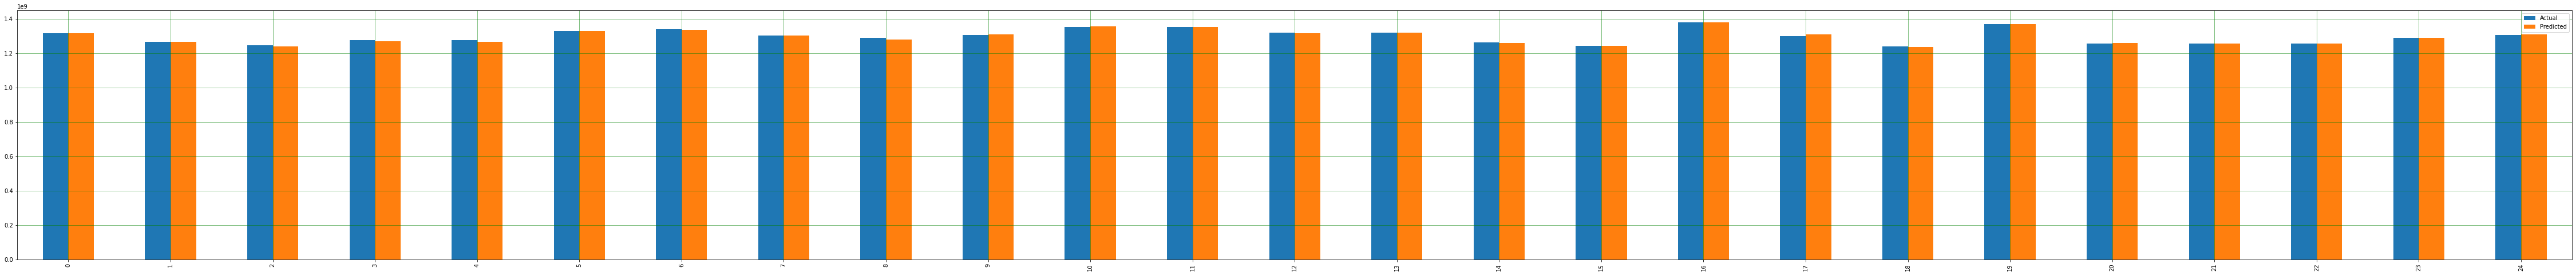

days_in_current_status    0.98062293745567
updated                   0.01267447643458
created                   0.00528261071697
description_length        0.00032913060607
comment_count             0.00029045117377
reporter                  0.00025607572761
watch_count               0.00016072463119
summary_length            0.00015313929035
priority                  0.00008965356556
issue_type                0.00005608626618
vote_count                0.00004777006659
resolution                0.00003052695234
status                    0.00000641711311
dtype: float64


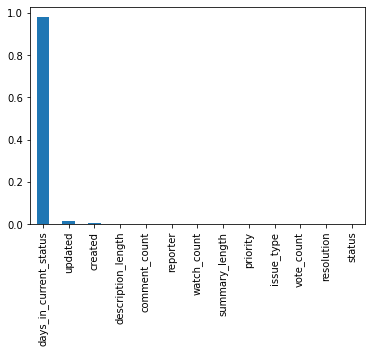

In [72]:
# Plot Attuali e Predetti valori
y_test_norm__fixed = y_test_norm__fixed.reshape(-1)
tuples = list(zip(y_test_norm__fixed,y_pred_norm_fixed))

df = pd.DataFrame(tuples, columns=['Actual','Predicted'])
df.plot(kind = 'bar', figsize=(80,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color = 'green')

plt.grid(which='minor', linestyle=':', linewidth='0.5', color = 'black')
plt.show()

# Analisi componenti che influenzano il modello

importance = regr_norm.feature_importances_
feature_imp = pd.Series(importance, index = X.columns).sort_values(ascending= False)

print(feature_imp)
feature_imp.plot(kind='bar')

# Caso di interesse 3: predizione su other normalizzato

In [73]:
other_norm = pd.DataFrame(StandardScaler().fit_transform(other),columns = other.columns)
other_norm

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,comment_count,description_length,summary_length,watch_count,resolution,days_in_current_status
0,0.0,1.83569819408463,1.52001847453633,0.75733094473005,1.01412713326993,1.80181499417023,1.67639580383395,-0.18603979335873,-0.60703701634076,-0.62503830024523,-0.41440421952582,0.28810815029758,0.0,-1.59353979947525
1,0.0,0.43253272144965,1.52010064602543,0.75733094473005,1.08423213814860,1.77232261185744,1.67644865273650,-0.18603979335873,-0.01166481584052,0.02259480959715,0.17987875462934,2.18308753060536,0.0,-1.59359302615260
2,0.0,-0.97063275118533,1.64645989107612,-0.14076783359294,-1.49563204138643,1.73883710381431,1.77532113046843,-0.18603979335873,0.13717823428454,-0.30853587695470,-0.56297496306460,1.70934268552842,0.0,-1.71995268930063
3,0.0,1.83569819408463,1.64645988795962,0.75733094473005,0.01863606399282,1.71084728465329,1.59041591100462,-0.18603979335873,-0.30935091609064,0.68352634058618,-0.31535705716662,0.76185299537452,0.0,-1.71995268617785
4,0.0,0.43253272144965,1.46405084937673,-0.14076783359294,-1.36944303260483,1.70837723608352,1.62063615279218,-0.18603979335873,-0.30935091609064,-0.06384492785615,-0.11726273244824,0.76185299537452,0.0,-1.53738163977018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,0.0,0.43253272144965,1.97002888085086,-0.14076783359294,-1.43954803748350,1.45619954826599,2.05106637561391,-0.18603979335873,0.28602128440960,-0.61838908967190,-0.21630989480743,1.23559784045147,0.0,-2.04336238954624
953,0.0,0.43253272144965,1.97149836726740,0.75733094473005,1.21042114693020,1.17631697195281,1.75948297622081,1.70800363477221,0.13717823428454,6.76223464672478,0.03130801109055,2.18308753060536,0.0,-1.71995275178106
954,0.0,-0.97063275118533,1.97002894790362,-0.14076783359294,0.62153910594938,0.89452653994520,2.05101864453048,1.70800363477221,3.56056838716093,-0.10772971764013,0.97225605350288,3.13057722075926,0.0,-2.04336245657106
955,0.0,0.43253272144965,1.97002888650851,-1.03886661191594,-0.47209897015786,0.67376307539080,2.09616823719991,-0.18603979335873,3.11403923678575,-0.34843114039469,-1.55344658665653,2.18308753060536,0.0,-2.04336239517283


In [74]:
Y_other_norm = pd.DataFrame(other_norm.resolutiondate)

In [75]:
Y_other_norm

,resolutiondate
0,1.67639580383395
1,1.67644865273650
2,1.77532113046843
3,1.59041591100462
4,1.62063615279218
...,...
952,2.05106637561391
953,1.75948297622081
954,2.05101864453048
955,2.09616823719991


In [76]:
other_norm = other_norm[other_norm.columns.difference(['resolutiondate'])]

In [77]:
other_norm

,comment_count,created,days_in_current_status,description_length,issue_type,priority,reporter,resolution,status,summary_length,updated,vote_count,watch_count
0,-0.60703701634076,1.80181499417023,-1.59353979947525,-0.62503830024523,0.75733094473005,1.83569819408463,1.01412713326993,0.0,0.0,-0.41440421952582,1.52001847453633,-0.18603979335873,0.28810815029758
1,-0.01166481584052,1.77232261185744,-1.59359302615260,0.02259480959715,0.75733094473005,0.43253272144965,1.08423213814860,0.0,0.0,0.17987875462934,1.52010064602543,-0.18603979335873,2.18308753060536
2,0.13717823428454,1.73883710381431,-1.71995268930063,-0.30853587695470,-0.14076783359294,-0.97063275118533,-1.49563204138643,0.0,0.0,-0.56297496306460,1.64645989107612,-0.18603979335873,1.70934268552842
3,-0.30935091609064,1.71084728465329,-1.71995268617785,0.68352634058618,0.75733094473005,1.83569819408463,0.01863606399282,0.0,0.0,-0.31535705716662,1.64645988795962,-0.18603979335873,0.76185299537452
4,-0.30935091609064,1.70837723608352,-1.53738163977018,-0.06384492785615,-0.14076783359294,0.43253272144965,-1.36944303260483,0.0,0.0,-0.11726273244824,1.46405084937673,-0.18603979335873,0.76185299537452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,0.28602128440960,1.45619954826599,-2.04336238954624,-0.61838908967190,-0.14076783359294,0.43253272144965,-1.43954803748350,0.0,0.0,-0.21630989480743,1.97002888085086,-0.18603979335873,1.23559784045147
953,0.13717823428454,1.17631697195281,-1.71995275178106,6.76223464672478,0.75733094473005,0.43253272144965,1.21042114693020,0.0,0.0,0.03130801109055,1.97149836726740,1.70800363477221,2.18308753060536
954,3.56056838716093,0.89452653994520,-2.04336245657106,-0.10772971764013,-0.14076783359294,-0.97063275118533,0.62153910594938,0.0,0.0,0.97225605350288,1.97002894790362,1.70800363477221,3.13057722075926
955,3.11403923678575,0.67376307539080,-2.04336239517283,-0.34843114039469,-1.03886661191594,0.43253272144965,-0.47209897015786,0.0,0.0,-1.55344658665653,1.97002888650851,-0.18603979335873,2.18308753060536


# Risultati terzo caso

In [78]:
X_train_norm_other, X_test_norm_other, y_train_norm_other, y_test_norm_other = train_test_split(other_norm,
                                                   Y_other_norm,test_size=0.2,random_state = 44)
y_test_norm_other = np.array(y_test_norm_other)
regr_norm_other = RandomForestRegressor(n_estimators=50, random_state=44)
regr_norm_other.fit(X_train_norm_other, y_train_norm_other)

y_pred_norm_other = regr_norm_other.predict(X_test_norm_other)

y_test_norm__other = scaler.inverse_transform(y_test_norm_other) # ritorno al formato originale
y_pred_norm_other = scaler.inverse_transform(y_pred_norm_other)


mae = metrics.mean_absolute_error(y_test_norm__other, y_pred_norm_other)

mae_in_day = round((mae / 60) / 60 / 24)
rmse = np.sqrt(metrics.mean_squared_error(y_test_norm__other, y_pred_norm_other))
rmse_in_day = round((rmse / 60) / 60 / 24)

print('Mean Absolute Error (MAE) in giorni arrotondato:', mae_in_day)
#print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_norm , y_pred_norm))
print('Root Mean Squared Error (RMSE):', rmse_in_day)
mape = np.mean(np.abs((y_test_norm__other - y_pred_norm_other) / np.abs(y_test_norm__other)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

print("Training Accuracy = ", regr_norm_other.score(X_train_norm_other, y_train_norm_other))
print("Test Accuracy = ", regr_norm_other.score(X_test_norm_other, y_test_norm_other))

/home/scicchitano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error (MAE) in giorni arrotondato: 14.0
Root Mean Squared Error (RMSE): 22.0
Mean Absolute Percentage Error (MAPE): 3.78
Accuracy: 96.22
Training Accuracy =  0.9995943276737898
Test Accuracy =  0.9980561037941912


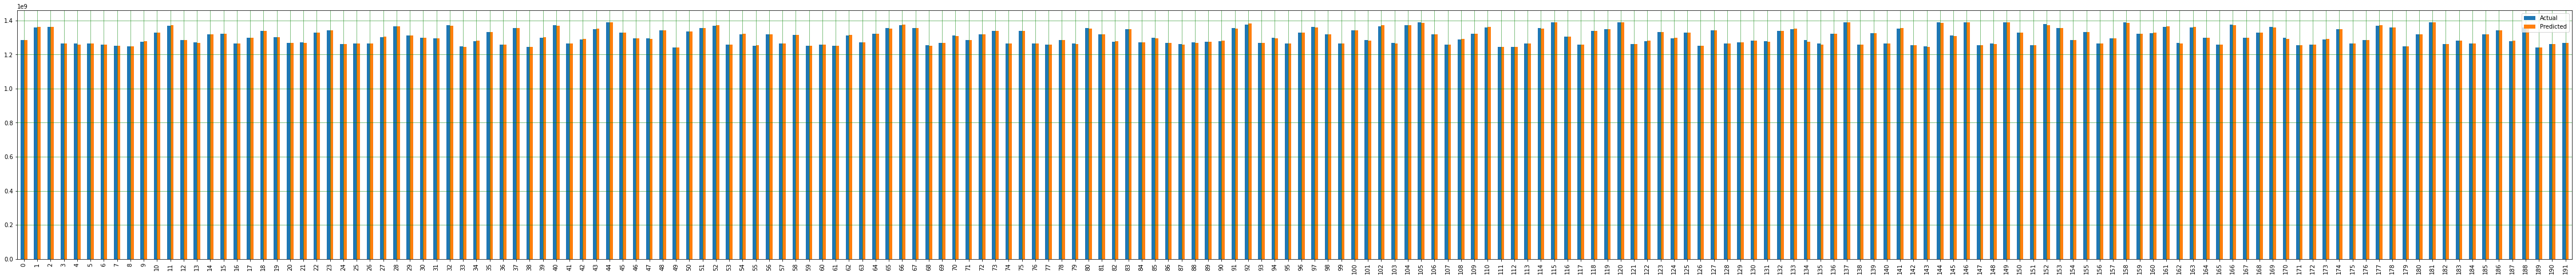

days_in_current_status    0.97522330024834
created                   0.01256904139580
updated                   0.01047785664445
summary_length            0.00035053292248
reporter                  0.00029430384299
watch_count               0.00028848617495
description_length        0.00028480820504
comment_count             0.00027540916616
priority                  0.00010803433907
issue_type                0.00008964693253
vote_count                0.00003858012818
status                    0.00000000000000
resolution                0.00000000000000
dtype: float64


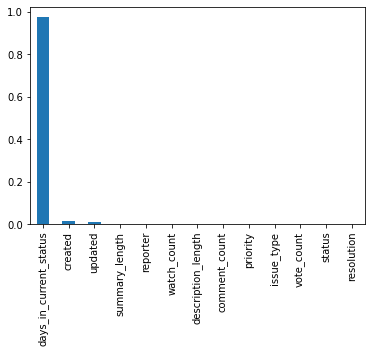

In [79]:
# Plot Attuali e Predetti valori
y_test_norm__other = y_test_norm__other.reshape(-1)
tuples = list(zip(y_test_norm__other,y_pred_norm_other))

df = pd.DataFrame(tuples, columns=['Actual','Predicted'])
df.plot(kind = 'bar', figsize=(80,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color = 'green')

plt.grid(which='minor', linestyle=':', linewidth='0.5', color = 'black')
plt.show()

# Analisi componenti che influenzano il modello

importance = regr_norm_other.feature_importances_
feature_imp = pd.Series(importance, index = X.columns).sort_values(ascending= False)

print(feature_imp)
feature_imp.plot(kind='bar')

# N.B. CLICCARE DUE VOLTE SULL'IMMAGINE PER INGRANDIRLA 

# Neural network model

In [81]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

# Model training

In [82]:
n_features = 13
model = Sequential()
model.add(Dense(7, input_dim = n_features, activation = 'relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam',metrics=['mae', 'mse'])
history = model.fit(X_train_norm, y_train_norm, epochs=1000, batch_size=5, validation_split = 0.2)

Epoch 1/1000
138/138 [==============================] - 1s 4ms/step - loss: 1.4279 - mae: 0.9564 - mse: 1.4279 - val_loss: 1.0310 - val_mae: 0.8364 - val_mse: 1.0310
Epoch 2/1000
138/138 [==============================] - 0s 2ms/step - loss: 0.6458 - mae: 0.6196 - mse: 0.6458 - val_loss: 0.5187 - val_mae: 0.5714 - val_mse: 0.5187
Epoch 3/1000
138/138 [==============================] - 0s 2ms/step - loss: 0.3775 - mae: 0.4557 - mse: 0.3775 - val_loss: 0.2989 - val_mae: 0.4169 - val_mse: 0.2989
Epoch 4/1000
138/138 [==============================] - 0s 2ms/step - loss: 0.2493 - mae: 0.3686 - mse: 0.2493 - val_loss: 0.1969 - val_mae: 0.3334 - val_mse: 0.1969
Epoch 5/1000
138/138 [==============================] - 0s 2ms/step - loss: 0.1796 - mae: 0.3106 - mse: 0.1796 - val_loss: 0.1431 - val_mae: 0.2842 - val_mse: 0.1431
Epoch 6/1000
138/138 [==============================] - 0s 2ms/step - loss: 0.1356 - mae: 0.2689 - mse: 0.1356 - val_loss: 0.1104 - val_mae: 0.2489 - val_mse: 0.1104
Epoc

# Predizione e risultati

In [84]:
predictions = model.predict(X_test_norm)

In [85]:
y_pred_norm = scaler.inverse_transform(predictions)

mae = metrics.mean_absolute_error(y_test_norm_, y_pred_norm)

mae_in_day = round((mae / 60) / 60 / 24)
rmse = np.sqrt(metrics.mean_squared_error(y_test_norm_, y_pred_norm))
rmse_in_day = round((rmse / 60) / 60 / 24)

print('Mean Absolute Error (MAE) in giorni arrotondato:', mae_in_day)
#print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_norm , y_pred_norm))
print('Root Mean Squared Error (RMSE):', rmse_in_day)
mape = np.mean(np.abs((y_test_norm_ - y_pred_norm) / np.abs(y_test_norm_)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

print("Training Accuracy = ", regr_norm.score(X_train_norm, y_train_norm))
print("Test Accuracy = ", regr_norm.score(X_test_norm, y_test_norm))

Mean Absolute Error (MAE) in giorni arrotondato: 21.0
Root Mean Squared Error (RMSE): 29.0
Mean Absolute Percentage Error (MAPE): 3.77
Accuracy: 96.23
Training Accuracy =  1.0
Test Accuracy =  0.9960816714342697


In [86]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.00242597423494,0.03390265628695,0.00242597376928,0.00282597122714,0.03792861849070,0.00282597122714,995
996,0.00254971417598,0.03523690626025,0.00254971440881,0.00306505826302,0.04004336893559,0.00306505826302,996
997,0.00249486509711,0.03428456932306,0.00249486509711,0.00316108996049,0.04033524170518,0.00316108996049,997
998,0.00242711510509,0.03379315510392,0.00242711510509,0.00356883951463,0.04116695001721,0.00356883904897,998
999,0.00256388378330,0.03447313606739,0.00256388378330,0.00291062565520,0.03821925073862,0.00291062565520,999


In [87]:
#### plot loss values

def plot_loss(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center')
    plt.show()


def plot_stat(history, stat):
    history_dict = history.history
    loss_values = history_dict[stat]
    val_loss_values = history_dict['val_' + stat]
    epochs = range(1, len(loss_values) + 1)
    
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss_values, 'bo', label='Training accuracy')
    plt.plot(epochs, val_loss_values, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel(stat)
    plt.legend(loc='upper center')
    plt.show()

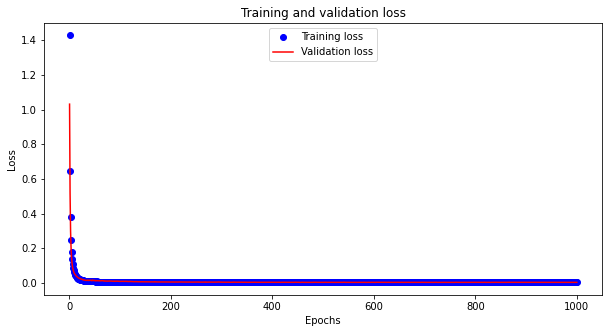

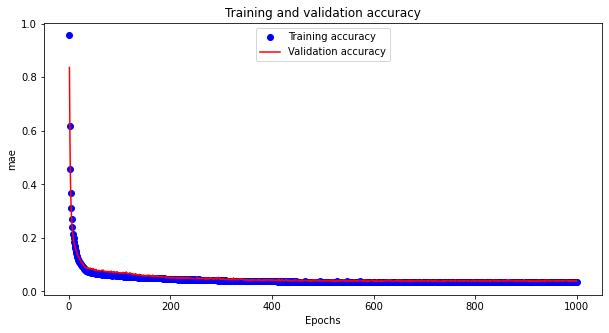

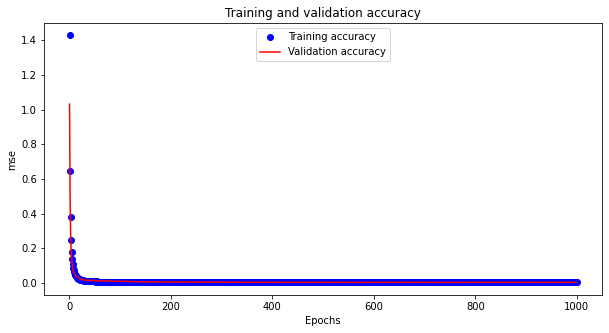

In [88]:
plot_loss(history)
plot_stat(history, 'mae')
plot_stat(history, 'mse')

# Funzione per convertire secondi in human data

In [117]:
def human_data(seconds): 
    return time.strftime("%Y-%m-%dT%H:%M:%S", time.localtime(seconds))

In [118]:
print(human_data(1.25988133574300e+09))
print(human_data(1.25967998e+09))
print(human_data(1.30043578e+09))

2009-12-04T00:02:15
2009-12-01T16:06:20
2011-03-18T09:09:40


# File JSON ricerca feature interessanti

In [25]:
filename = 'avro-issues.json'

In [26]:
df_json = pd.read_json(filename,lines=True)

In [32]:
df_json.head(1)

,operations,editmeta,transitions,key,changelog,fields,self,names,renderedFields,_id,id,expand,schema
0,"{'linkGroups': [{'links': [], 'id': 'view.issu...",{'fields': {}},[],AVRO-1350,"{'total': 2, 'startAt': 0, 'histories': [{'ite...","{'comment': {'total': 2, 'startAt': 0, 'maxRes...",https://issues.apache.org/jira/rest/api/2/issu...,"{'comment': 'Comment', 'aggregatetimeestimate'...","{'comment': {'total': 2, 'startAt': 0, 'maxRes...",AVRO-1350,12655581,"renderedFields,names,schema,transitions,operat...","{'comment': {'items': 'comment', 'type': 'arra..."


In [61]:
subtask = list()
for a in df_json['fields']:
    subtask.append(a['issuetype']['subtask'])
len(subtask)

1458

In [62]:
subtask

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [59]:
work_ratio = list()
for a in df_json['fields']:
    work_ratio.append(a['workratio'])
len(b)

1458

In [63]:
work_ratio

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,


In [71]:
priority_id = list()
for a in df_json['fields']:
    priority_id.append(a['priority']['id'])
len(priority_id)

1458

In [72]:
priority_id

['3',
 '2',
 '3',
 '4',
 '4',
 '3',
 '4',
 '5',
 '2',
 '3',
 '3',
 '3',
 '4',
 '4',
 '4',
 '3',
 '4',
 '5',
 '3',
 '4',
 '4',
 '3',
 '3',
 '3',
 '4',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '3',
 '3',
 '3',
 '4',
 '4',
 '3',
 '3',
 '3',
 '3',
 '4',
 '4',
 '3',
 '3',
 '4',
 '4',
 '4',
 '3',
 '3',
 '3',
 '4',
 '3',
 '3',
 '4',
 '3',
 '4',
 '3',
 '3',
 '3',
 '3',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '3',
 '3',
 '4',
 '3',
 '3',
 '4',
 '4',
 '4',
 '3',
 '3',
 '3',
 '4',
 '3',
 '3',
 '2',
 '4',
 '4',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '5',
 '5',
 '3',
 '3',
 '3',
 '4',
 '1',
 '3',
 '3',
 '3',
 '4',
 '4',
 '3',
 '3',
 '5',
 '4',
 '3',
 '4',
 '3',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '4',
 '4',
 '4',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '3',
 '4',
 '3',
 '5',
 '3',
 '5',
 '3',
 '3',
 '3',
 '4',
 '3',
 '3',
 '4',
 '3',
 '3',
 '4',
 '3',
 '4',
 '3',
 '3',
 '3',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '3',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3'

In [105]:
total_aggr_progress = list()
for a in df_json['fields']:
    total_aggr_progress.append(a['aggregateprogress']['total'])
len(total_aggr_progress)

1458

In [106]:
total_aggr_progress

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 86400,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7200,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 600,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 600,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14400,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 86400,
 0,
 0,
 0,
 0,
 604800,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 86400,
 3600,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 300,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1209600,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7200,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3600,
 0,
 0,
 86400,

# Carico il file csv originale

In [114]:
data_new = pd.read_csv('avro-issues.csv')

# Aggiungo le nuove colonne

In [115]:
data_new['total_aggr_progress'] = total_aggr_progress
data_new['work_ratio'] = work_ratio
data_new['subtask'] = subtask

data_new

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,project,assignee,comment_count,key,description_length,summary_length,watch_count,resolution,days_in_current_status,total_aggr_progress,work_ratio,subtask
0,Open,Major,2013-07-02T02:33:35.279+0000,Bug,keyer,2013-07-01T11:38:36.150+0000,NaN,0,AVRO,NaN,2,AVRO-1350,3042.0,46,1,NaN,231.24858841599999,0,-1,False
1,Resolved,Critical,2013-06-20T16:41:00.043+0000,Bug,scott_carey,2013-06-20T16:29:17.709+0000,2013-06-20T16:41:00.024+0000,0,AVRO,NaN,2,AVRO-1349,41.0,43,2,Fixed,242.03858963400000,0,-1,False
2,Resolved,Major,2013-06-20T17:38:07.697+0000,Bug,skye,2013-06-06T17:41:12.389+0000,2013-06-20T17:18:00.789+0000,0,AVRO,skye,6,AVRO-1346,528.0,55,6,Fixed,242.01288630200000,0,-1,False
3,Open,Minor,2013-05-30T22:07:02.491+0000,Improvement,davidtaylor,2013-05-30T22:02:52.515+0000,NaN,0,AVRO,NaN,1,AVRO-1342,312.0,44,1,NaN,262.81506567900004,0,-1,False
4,Open,Minor,2013-05-25T05:35:30.283+0000,Improvement,jdonofrio,2013-05-25T05:35:30.283+0000,NaN,0,AVRO,NaN,0,AVRO-1340,559.0,97,1,NaN,268.50073966200000,0,-1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,Closed,Major,2014-01-23T21:58:54.257+0000,New Feature,iocanel,2012-01-04T01:41:29.916+0000,2014-01-10T19:28:47.501+0000,0,AVRO,iocanel,27,AVRO-987,249.0,20,6,Fixed,24.81782564940000,0,-1,False
1454,Closed,Major,2014-01-24T21:50:17.361+0000,New Feature,hammer,2011-12-12T12:13:30.972+0000,2014-01-23T21:55:12.599+0000,4,AVRO,mark.lamley,51,AVRO-975,NaN,17,11,Fixed,24.81783522270000,0,-1,False
1455,Closed,Major,2013-08-20T17:46:09.242+0000,New Feature,patrickangeles,2011-05-17T12:38:35.682+0000,2013-07-01T18:05:03.682+0000,5,AVRO,dmcintosh,20,AVRO-823,88.0,29,14,Fixed,180.99334667099998,0,-1,False
1456,Open,Major,2014-01-10T18:19:25.676+0000,New Feature,cutting,2010-08-24T19:39:23.387+0000,NaN,0,AVRO,cutting,10,AVRO-625,243.0,34,12,NaN,1272.91471075000004,0,-1,False


# Creo il nuovo file csv

In [116]:
data_new.to_csv('avro-issues_new.csv')